In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,explained_variance_score


In [3]:
df = pd.read_csv('../data/train.csv')


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [6]:
train = df[['SalePrice', 'Lot Area', 'Lot Frontage', 'Mo Sold', 'Yr Sold', 'Overall Qual']]
df_dummies = pd.get_dummies(df['Sale Condition'], drop_first=True, dtype=int)
df_dummies2 = pd.get_dummies(df['Lot Shape'], drop_first=True, dtype=int)
df_dummies3 = pd.get_dummies(df['Sale Type'], drop_first=True, dtype=int)
df_dummies4 = pd.get_dummies(df['Bldg Type'], drop_first=True, dtype=int)
# df_dummies5 = pd.get_dummies(df['employee_residence'], drop_first=True, dtype=int)
# df_dummies6 = pd.get_dummies(df['salary_currency'], drop_first=True, dtype=int)
# df_dummies6 = pd.get_dummies(df['company_location'], drop_first=True, dtype=int)
df2 = pd.concat([train, df_dummies, df_dummies2, df_dummies3, df_dummies4],  axis=1)

In [7]:
df2

,SalePrice,Lot Area,Lot Frontage,Mo Sold,Yr Sold,Overall Qual,AdjLand,Alloca,Family,Normal,Partial,IR2,IR3,Reg,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,2fmCon,Duplex,Twnhs,TwnhsE
0,159000,9605,80.0,4,2009,7,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,271900,14684,90.0,6,2009,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,137500,14375,NaN,1,2009,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,248500,6472,48.0,4,2009,9,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,167000,9734,61.0,5,2009,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,220000,10041,80.0,2,2006,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2193,160000,6300,70.0,7,2009,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2194,225000,12460,41.0,5,2008,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2195,83000,10625,85.0,5,2010,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
for col in df2:
    if df2[col].isnull().sum() > 0:
        try:
            df2[col].fillna(df2[col].mean(), inplace = True)
        except:
            df2[col].fillna(df2[col].mode()[0],inplace = True)

In [9]:
target_var = 'SalePrice'
X = df2.drop(target_var, axis=1)
y = df2[target_var]

In [10]:
X

,Lot Area,Lot Frontage,Mo Sold,Yr Sold,Overall Qual,AdjLand,Alloca,Family,Normal,Partial,IR2,IR3,Reg,CWD,Con,ConLD,ConLI,ConLw,New,Oth,VWD,WD,2fmCon,Duplex,Twnhs,TwnhsE
0,9605,80.000000,4,2009,7,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,14684,90.000000,6,2009,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,14375,69.549319,1,2009,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6472,48.000000,4,2009,9,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9734,61.000000,5,2009,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,10041,80.000000,2,2006,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2193,6300,70.000000,7,2009,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2194,12460,41.000000,5,2008,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2195,10625,85.000000,5,2010,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
y

0       159000
1       271900
2       137500
3       248500
4       167000
         ...  
2192    220000
2193    160000
2194    225000
2195     83000
2196    250000
Name: SalePrice, Length: 2197, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [13]:
model = RandomForestRegressor( random_state=42) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test) 
mae = mean_absolute_error(y_test, y_pred)
print(f'R score train: {train_score}, R score test: {test_score} and Mae: {mae}')

R score train: 0.9633544308793284, R score test: 0.7030596645042124 and Mae: 26535.530444155844


In [14]:
model = RandomForestRegressor(n_estimators = 300, random_state=42) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test) 
mae = mean_absolute_error(y_test, y_pred)
print(f'R score train: {train_score}, R score test: {test_score} and Mae: {mae}')

R score train: 0.9660156977435392, R score test: 0.703742528038457 and Mae: 26521.706394660898


In [15]:
model = RandomForestRegressor(n_estimators = 300, max_depth = 4, random_state=42) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test) 
mae = mean_absolute_error(y_test, y_pred)
print(f'R score train: {train_score}, R score test: {test_score} and Mae: {mae}')

R score train: 0.8002909000927194, R score test: 0.7165861472271403 and Mae: 27199.65736347619


In [16]:
model = RandomForestRegressor(n_estimators = 300, max_depth= 4, min_samples_leaf=5, random_state=42) 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test) 
mae = mean_absolute_error(y_test, y_pred)
print(f'R score train: {train_score}, R score test: {test_score} and Mae: {mae}')

R score train: 0.7915140081074855, R score test: 0.7176202574573668 and Mae: 27276.381863699553


In [17]:
y_pred.min()

68650.32221225875

In [18]:
y_pred.max()

453811.1887857037

In [19]:
y_test.min()

45000

In [20]:
y_test.max()

591587

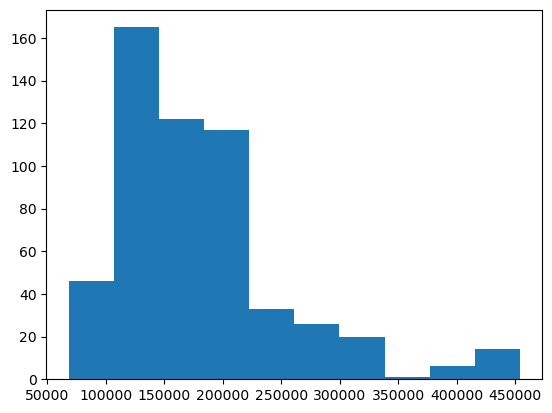

In [21]:
plt.hist(y_pred);

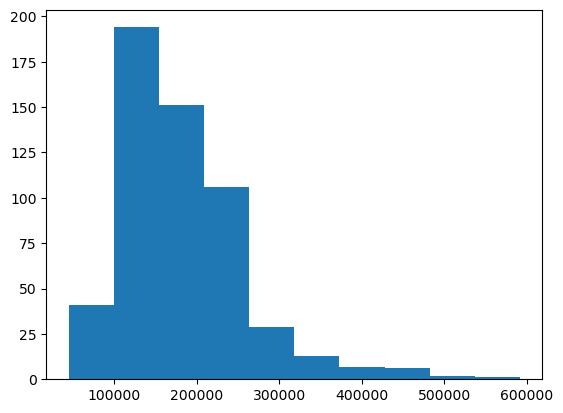

In [22]:
plt.hist(y_test);

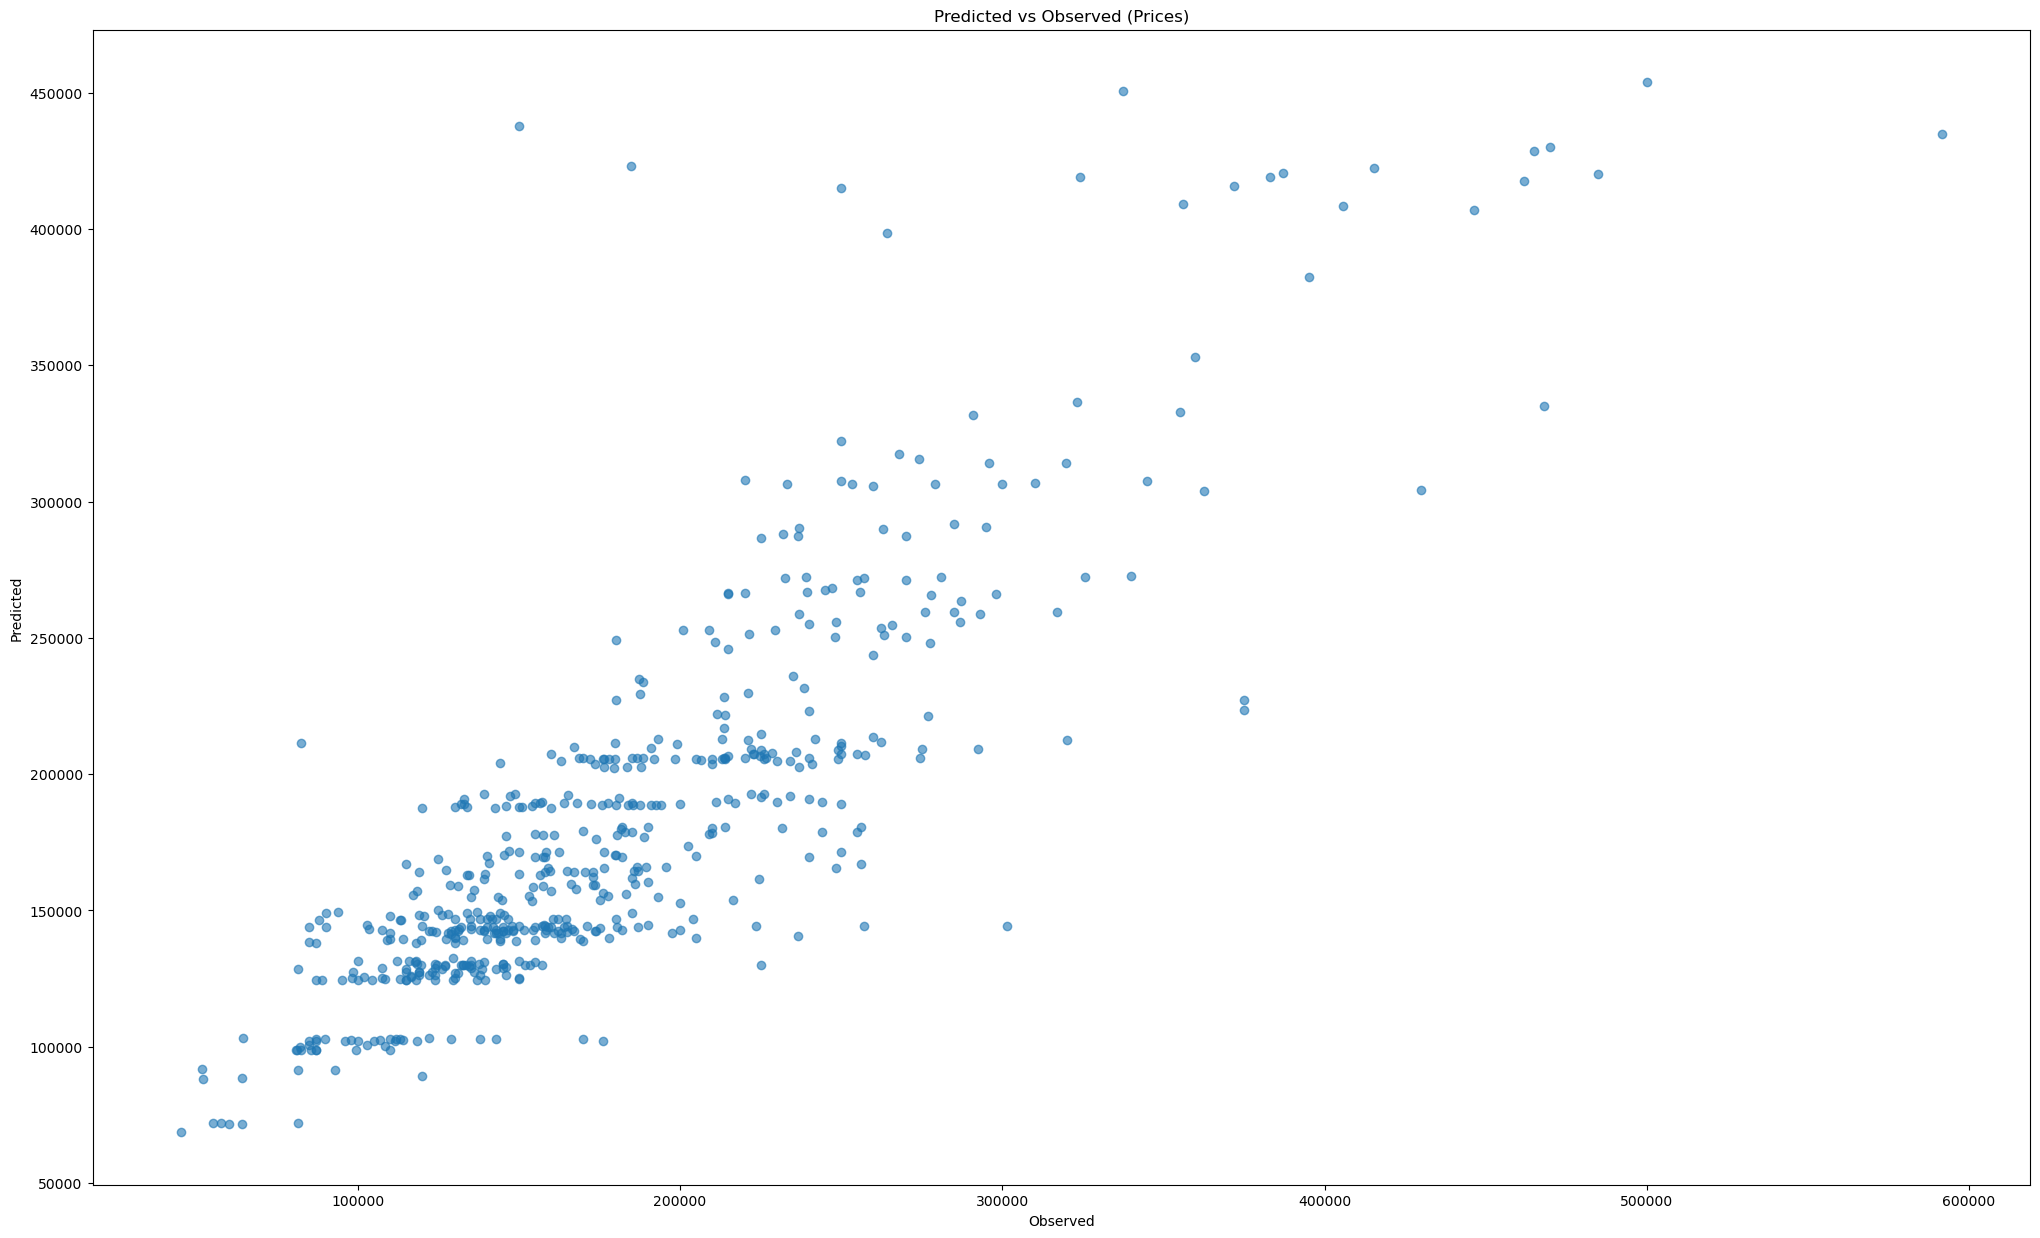

In [23]:
plt.rcParams['figure.figsize'] = (25,15)
plt.scatter(x = y_test, y = y_pred ,marker='o',alpha = 0.6)

# adding labels
plt.title('Predicted vs Observed (Prices)')
plt.xlabel('Observed')
plt.ylabel('Predicted')


plt.show()


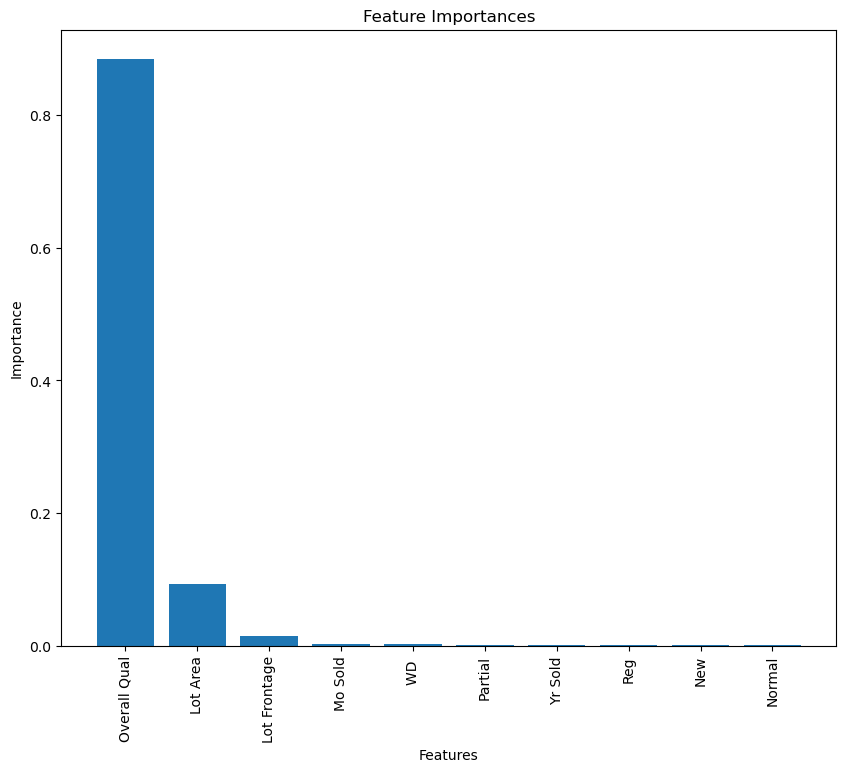

In [24]:
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the top 10 most important features
top_features = indices[:10]

# Plot the feature importances as a bar graph
plt.figure(figsize=(10,8))
plt.bar(range(10), importances[top_features])
plt.xticks(range(10), X.columns[top_features], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()